# EDA and Cleaning data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Bring in data with less features

In [2]:
df = pd.read_csv('../../datasets/less_feature_df.csv', index_col = [0])

In [3]:
df.shape

(449371, 99)

In [4]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp',
       'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet',
       'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle',
       'qb_dropback', 'qb_scramble', 'home_timeouts_remaining',
       'away_timeouts_remaining', 'timeout', 'posteam_timeouts_remaining',
       'defteam_timeouts_remaining', 'total_home_score', 'total_away_score',
       'posteam_score', 'defteam_score', 'score_differential',
       'posteam_score_post', 'defteam_score_post', 'score_differential_post',
       'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob',
       'fg_prob', 'safety_prob', 'td_prob', 'ep', 'epa', 'total_home_epa',
       'total_away_epa', 'wp', 'def_wp', 'home_wp', 'away_wp', 'wpa',

In [5]:
#pd.options.display.max_columns = 255

In [6]:
df.head(10)

play_id     game_id home_team away_team posteam posteam_type defteam  \
0       46  2009091000       PIT       TEN     PIT         home     TEN   
1       68  2009091000       PIT       TEN     PIT         home     TEN   
2       92  2009091000       PIT       TEN     PIT         home     TEN   
3      113  2009091000       PIT       TEN     PIT         home     TEN   
4      139  2009091000       PIT       TEN     PIT         home     TEN   
5      162  2009091000       PIT       TEN     TEN         away     PIT   
6      183  2009091000       PIT       TEN     TEN         away     PIT   
7      207  2009091000       PIT       TEN     TEN         away     PIT   
8      228  2009091000       PIT       TEN     TEN         away     PIT   
9      253  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100   game_date  ...  pass_touchdown  \
0           TEN          30.0  2009-09-10  ...             0.0   
1           PIT          58.0  2009-09-10  ...             0.0   
2           PIT          53.0  2009-09-10  ...             0.0   
3           PIT          56.0  2009-09-10  ...             0.0   
4           PIT          56.0  2009-09-10  ...             0.0   
5           TEN          98.0  2009-09-10  ...             0.0   
6           TEN          98.0  2009-09-10  ...             0.0   
7           TEN          94.0  2009-09-10  ...             0.0   
8           TEN          96.0  2009-09-10  ...             0.0   
9           TEN          43.0  2009-09-10  ...             0.0   

   rush_touchdown  return_touchdown field_goal_attempt  punt_attempt  fumble  \
0             0.0               0.0                0.0           0.0     0.0   
1             0.0               0.0                0.0           0.0     0.0   
2             0.0               0.0                0.0           0.0     0.0   
3             0.0               0.0                0.0           0.0     0.0   
4             0.0               0.0                0.0           1.0     0.0   
5             0.0               0.0                0.0           0.0     0.0   
6             0.0               0.0                0.0           0.0     0.0   
7             0.0               0.0                0.0           0.0     0.0   
8             0.0               0.0                0.0           1.0     0.0   
9             0.0               0.0                0.0           0.0     0.0   

   complete_pass  lateral_reception  lateral_rush  return_yards  
0            0.0                0.0           0.0          39.0  
1            1.0                0.0           0.0           0.0  
2            0.0                0.0           0.0           0.0  
3            0.0                0.0           0.0           0.0  
4            0.0                0.0           0.0           0.0  
5            0.0                0.0           0.0           0.0  
6            1.0                0.0           0.0           0.0  
7            0.0                0.0           0.0           0.0  
8            0.0                0.0           0.0          11.0  
9            1.0                0.0           0.0           0.0  

[10 rows x 99 columns]

In [7]:
# function to drop columns with a large number of nulls
to_drop = []
for i in df.columns:
    if df[i].isnull().sum() > 100000:
        to_drop.append(i)

In [8]:
df.drop(to_drop, axis = 1, inplace = True)

In [9]:
#df.isnull().sum()

# Exploring some features

In [10]:
df['sp'].value_counts()
# whether play resulted in any kind of score

0    416976
1     32395
Name: sp, dtype: int64

In [11]:
df['play_type'].value_counts()

pass           186677
run            132692
no_play         42431
kickoff         25552
punt            23914
extra_point     10934
field_goal       9777
qb_kneel         3830
qb_spike          690
Name: play_type, dtype: int64

In [12]:
df['down'].value_counts()

1.0    153256
2.0    114578
3.0     73931
4.0     39644
Name: down, dtype: int64

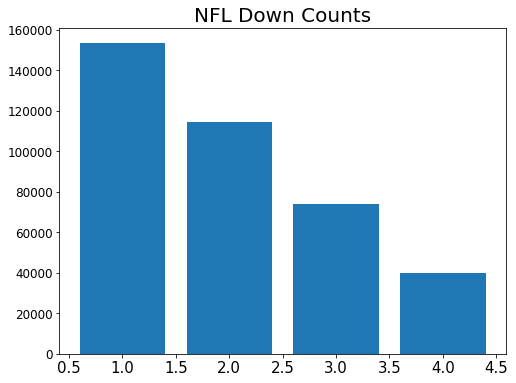

In [13]:
x = pd.DataFrame(df['down'].value_counts())
plt.figure(figsize=(8,6))
plt.bar(x.index, x.down)
plt.title('NFL Down Counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12);

In [14]:
# these aren't necessarilly null values. Kick-offs, extra points, etc. Not too sure how to classify these if at all
# but they shouldn't come into play for fourth downs
df['down'].isnull().sum()

67962

In [15]:
df.groupby(df["play_type"]).mean()

play_id       game_id  yardline_100  \
play_type                                              
extra_point  2089.109201  2.013608e+09      7.165539   
field_goal   2175.168661  2.013636e+09     19.505165   
kickoff      1957.124843  2.013624e+09     33.965052   
no_play      2364.106879  2.013688e+09     48.422652   
pass         2144.625326  2.013646e+09     52.942596   
punt         1997.217362  2.013532e+09     65.847746   
qb_kneel     3639.820366  2.013737e+09     54.163969   
qb_spike     3255.713043  2.013339e+09     33.630435   
run          2018.137650  2.013554e+09     51.677938   

             quarter_seconds_remaining  half_seconds_remaining  \
play_type                                                        
extra_point                 397.931590              789.122210   
field_goal                  357.917459              694.646517   
kickoff                     498.410614              972.817534   
no_play                     333.883314              617.916260   
pass                        418.742593              808.122370   
punt                        447.131764              883.234736   
qb_kneel                     54.502872               66.017232   
qb_spike                     24.759420               24.759420   
run                         461.642284              909.633919   

             game_seconds_remaining  quarter_end      drive        sp  \
play_type                                                               
extra_point             1730.950700          0.0  11.433602  0.971648   
field_goal              1660.096042          0.0  11.848317  0.840237   
kickoff                 1877.745998          0.0  11.617682  0.004501   
no_play                 1505.090247          0.0  13.332139  0.007424   
pass                    1696.237785          0.0  12.281674  0.046396   
punt                    1826.570849          0.0  11.430626  0.008363   
qb_kneel                 470.664752          0.0  20.531593  0.000000   
qb_spike                 809.976812          0.0  17.917391  0.000000   
run                     1804.669204          0.0  11.725959  0.032142   

                  qtr  ...  pass_touchdown  rush_touchdown  return_touchdown  \
play_type              ...                                                     
extra_point  2.518840  ...        0.000000        0.000000          0.000000   
field_goal   2.569295  ...        0.000000        0.000000          0.000000   
kickoff      2.474562  ...        0.000000        0.000000          0.003953   
no_play      2.707879  ...        0.000000        0.000000          0.000872   
pass         2.587314  ...        0.041435        0.000000          0.002512   
punt         2.473865  ...        0.000000        0.000000          0.005269   
qb_kneel     3.539948  ...        0.000000        0.000000          0.000000   
qb_spike     3.140580  ...        0.000000        0.000000          0.000000   
run          2.515585  ...        0.000000        0.030311          0.000000   

             field_goal_attempt  punt_attempt    fumble  complete_pass  \
play_type                                                                
extra_point            0.000000      0.000000  0.000000       0.000000   
field_goal             1.000000      0.000000  0.000307       0.000000   
kickoff                0.000000      0.000000  0.011623       0.000000   
no_play                0.000848      0.002404  0.000189       0.000000   
pass                   0.000000      0.000000  0.016526       0.584132   
punt                   0.000000      1.000000  0.035753       0.000042   
qb_kneel               0.000000      0.000000  0.000000       0.000000   
qb_spike               0.000000      0.000000  0.000000       0.000000   
run                    0.000000      0.000000  0.017386       0.000030   

             lateral_reception  lateral_rush  return_yards  
play_type                                                   
extra_point           0.000000      0.000000      0

#  Split play_type into dummys to get play type (run/pass/punt)

In [16]:
dummies = pd.get_dummies(df['play_type'], drop_first = False)

In [17]:
df = pd.concat((df, dummies), axis = 1)

In [18]:
df.head()

play_id     game_id home_team away_team posteam posteam_type defteam  \
0       46  2009091000       PIT       TEN     PIT         home     TEN   
1       68  2009091000       PIT       TEN     PIT         home     TEN   
2       92  2009091000       PIT       TEN     PIT         home     TEN   
3      113  2009091000       PIT       TEN     PIT         home     TEN   
4      139  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100   game_date  ...  return_yards  extra_point  \
0           TEN          30.0  2009-09-10  ...          39.0            0   
1           PIT          58.0  2009-09-10  ...           0.0            0   
2           PIT          53.0  2009-09-10  ...           0.0            0   
3           PIT          56.0  2009-09-10  ...           0.0            0   
4           PIT          56.0  2009-09-10  ...           0.0            0   

   field_goal kickoff  no_play  pass  punt  qb_kneel  qb_spike  run  
0           0       1        0     0     0         0         0    0  
1           0       0        0     1     0         0         0    0  
2           0       0        0     0     0         0         0    1  
3           0       0        0     1     0         0         0    0  
4           0       0        0     0     1         0         0    0  

[5 rows x 108 columns]

## Continuation of exploring features

Looking at averages with punts and fourth down attempts

In [19]:
df[df['play_type'] == 'punt'].groupby('down').mean()

play_id       game_id  yardline_100  quarter_seconds_remaining  \
down                                                                       
3.0   3387.000000  2.012107e+09     44.000000                  239.50000   
4.0   1997.101121  2.013532e+09     65.849573                  447.14913   

      half_seconds_remaining  game_seconds_remaining  quarter_end      drive  \
down                                                                           
3.0               689.500000               689.50000          0.0  17.000000   
4.0               883.250941              1826.66597          0.0  11.430161   

            sp       qtr  ...  return_yards  extra_point  field_goal  kickoff  \
down                      ...                                                   
3.0   0.000000  3.500000  ...     14.500000            0           0        0   
4.0   0.008364  2.473779  ...      4.060905            0           0        0   

      no_play  pass  punt  qb_kneel  qb_spike  run  
down                                                
3.0         0     0     1         0         0    0  
4.0         0     0     1         0         0    0  

[2 rows x 95 columns]

In [20]:
#df['ydstogo']

In [21]:
df[df['down'] == 4].groupby('play_type').mean()

play_id       game_id  yardline_100  \
play_type                                             
field_goal  2116.285492  2.013641e+09     19.124944   
no_play     2403.428800  2.013613e+09     46.131733   
pass        3225.617432  2.013679e+09     38.111111   
punt        1997.101121  2.013532e+09     65.849573   
qb_kneel    3579.379310  2.013924e+09     37.551724   
run         2336.405831  2.013490e+09     32.812245   

            quarter_seconds_remaining  half_seconds_remaining  \
play_type                                                       
field_goal                 385.926457              752.214842   
no_play                    377.295467              712.335467   
pass                       283.682967              438.473387   
punt                       447.149130              883.250941   
qb_kneel                    21.793103               21.793103   
run                        394.753353              737.435569   

            game_seconds_remaining  quarter_end      drive        sp  \
play_type                                                              
field_goal             1695.071985          0.0  11.538607  0.850245   
no_play                1470.735467          0.0  13.362133  0.012267   
pass                    779.191949          0.0  17.835329  0.090486   
punt                   1826.665970          0.0  11.430161  0.008364   
qb_kneel                456.275862          0.0  19.931034  0.000000   
run                    1506.765015          0.0  12.971429  0.096210   

                 qtr  ...  return_yards  extra_point  field_goal  kickoff  \
play_type             ...                                                   
field_goal  2.555407  ...      0.000000            0           1        0   
no_play     2.794667  ...      0.087467            0           0        0   
pass        3.457086  ...      0.713240            0           0        0   
punt        2.473779  ...      4.060905            0           0        0   
qb_kneel    3.517241  ...      0.000000            0           0        0   
run         2.772012  ...      0.000000            0           0        0   

            no_play  pass  punt  qb_kneel  qb_spike  run  
play_type                                                 
field_goal        0     0     0         0         0    0  
no_play           1     0     0         0         0    0  
pass              0     1     0         0         0    0  
punt              0     0     1         0         0    0  
qb_kneel          0     0     0         1         0    0  
run               0     0     0         0         0    1  

[6 rows x 96 columns]

Yardline is 0-100. If below 50, starting on your side of the field

In [22]:
df['yardline_100'].head()

0    30.0
1    58.0
2    53.0
3    56.0
4    56.0
Name: yardline_100, dtype: float64

Look at fourth down success rate

In [23]:
# successful 4th down conversion. 0s include all plays (punts, field goal...)
df['fourth_down_converted'].value_counts()


0.0    434159
1.0      2338
Name: fourth_down_converted, dtype: int64

In [24]:
df['fourth_down_failed'].value_counts()

0.0    434058
1.0      2439
Name: fourth_down_failed, dtype: int64

In [25]:
2338/(2338 + 2439)
# fourth down successful conversion rate

0.4894285116181704

In [26]:
df['ydstogo'].head()

0     0
1    10
2     5
3     8
4     8
Name: ydstogo, dtype: int64

In [27]:
df['yards_gained'].head()

0    0.0
1    5.0
2   -3.0
3    0.0
4    0.0
Name: yards_gained, dtype: float64

In [28]:
df['yardline_100'].head()

0    30.0
1    58.0
2    53.0
3    56.0
4    56.0
Name: yardline_100, dtype: float64

## Exploring fourth down stats by converting on fourth down and not converting on fourth down

In [29]:
df[df['down'] == 4].groupby('fourth_down_failed').mean()

play_id       game_id  yardline_100  \
fourth_down_failed                                            
0.0                 2089.770075  2.013571e+09     51.650839   
1.0                 3111.117671  2.013547e+09     36.649446   

                    quarter_seconds_remaining  half_seconds_remaining  \
fourth_down_failed                                                      
0.0                                422.922073              826.512458   
1.0                                292.850759              470.710537   

                    game_seconds_remaining  quarter_end      drive        sp  \
fourth_down_failed                                                             
0.0                            1738.821746          0.0  11.769590  0.223157   
1.0                             871.448544          0.0  17.232882  0.010660   

                         qtr  ...  return_yards  extra_point  field_goal  \
fourth_down_failed            ...                                          
0.0                 2.545462  ...      2.618123          0.0    0.242356   
1.0                 3.365314  ...      0.946289          0.0    0.000000   

                    kickoff  no_play      pass      punt  qb_kneel  qb_spike  \
fourth_down_failed                                                             
0.0                     0.0  0.04983  0.033840  0.644745   0.00000       0.0   
1.0                     0.0  0.01107  0.717917  0.000410   0.01189       0.0   

                         run  
fourth_down_failed            
0.0                 0.029229  
1.0                 0.258713  

[2 rows x 95 columns]

In [30]:
df[df['down'] == 4].groupby('fourth_down_converted').mean()

play_id       game_id  yardline_100  \
fourth_down_converted                                            
0.0                    2118.555839  2.013563e+09     51.671149   
1.0                    2697.387938  2.013687e+09     35.678358   

                       quarter_seconds_remaining  half_seconds_remaining  \
fourth_down_converted                                                      
0.0                                   418.829752              816.192605   
1.0                                   352.322070              619.473482   

                       game_seconds_remaining  quarter_end      drive  \
fourth_down_converted                                                   
0.0                               1715.034344          0.0  11.929518   
1.0                               1212.287853          0.0  14.925150   

                             sp       qtr  ...  return_yards  extra_point  \
fourth_down_converted                      ...                              
0.0                    0.212171  2.567429  ...      2.673086          0.0   
1.0                    0.176219  3.051326  ...      0.000000          0.0   

                       field_goal  kickoff   no_play      pass     punt  \
fourth_down_converted                                                     
0.0                      0.241697      0.0  0.050421  0.047086  0.64302   
1.0                      0.000000      0.0  0.000000  0.536784  0.00000   

                       qb_kneel  qb_spike       run  
fourth_down_converted                                
0.0                     0.00078       0.0  0.016995  
1.0                     0.00000       0.0  0.463216  

[2 rows x 95 columns]

## Make fourth down conversion it's own column, with 1 being successful, 0 failed conversion and NAN for the rest (if applicable)

In [31]:
df['4th_down_conversion'] = np.nan

In [32]:
df.head()

play_id     game_id home_team away_team posteam posteam_type defteam  \
0       46  2009091000       PIT       TEN     PIT         home     TEN   
1       68  2009091000       PIT       TEN     PIT         home     TEN   
2       92  2009091000       PIT       TEN     PIT         home     TEN   
3      113  2009091000       PIT       TEN     PIT         home     TEN   
4      139  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100   game_date  ...  extra_point  field_goal  \
0           TEN          30.0  2009-09-10  ...            0           0   
1           PIT          58.0  2009-09-10  ...            0           0   
2           PIT          53.0  2009-09-10  ...            0           0   
3           PIT          56.0  2009-09-10  ...            0           0   
4           PIT          56.0  2009-09-10  ...            0           0   

   kickoff no_play  pass  punt  qb_kneel  qb_spike  run  4th_down_conversion  
0        1       0     0     0         0         0    0                  NaN  
1        0       0     1     0         0         0    0                  NaN  
2        0       0     0     0         0         0    1                  NaN  
3        0       0     1     0         0         0    0                  NaN  
4        0       0     0     1         0         0    0                  NaN  

[5 rows x 109 columns]

In [33]:
df.loc[df['fourth_down_failed'] == 1, '4th_down_conversion'] = 0

In [34]:
df.loc[df['fourth_down_converted'] == 1, '4th_down_conversion'] = 1

In [35]:
df['4th_down_conversion'].value_counts()

0.0    2438
1.0    2338
Name: 4th_down_conversion, dtype: int64

## Make a column of total fourth down attempts

In [36]:
df['total_4th_attempts'] = np.nan

In [37]:
df.loc[df['fourth_down_failed'] == 1, 'total_4th_attempts'] = 1

In [38]:
df.loc[df['fourth_down_converted'] == 1, 'total_4th_attempts'] = 1

### Look at average yards to go for a successful attempt and a failed attempt and field position

In [39]:
df[df['4th_down_conversion']==1].groupby('ydstogo').mean()

play_id       game_id  yardline_100  quarter_seconds_remaining  \
ydstogo                                                                       
1        2229.273984  2.013633e+09     31.821953                 406.732066   
2        2733.558304  2.013880e+09     34.240283                 345.360424   
3        2998.913514  2.013863e+09     38.194595                 322.794595   
4        3072.384058  2.013865e+09     37.485507                 329.847826   
5        3377.430894  2.013880e+09     37.959350                 313.967480   
6        3171.776699  2.013999e+09     36.611650                 308.708738   
7        3070.231884  2.014195e+09     41.391304                 296.057971   
8        3392.725000  2.013428e+09     48.750000                 264.350000   
9        3404.236842  2.012554e+09     44.289474                 217.236842   
10       3851.504950  2.012988e+09     45.742574                 183.544554   
11       3600.956522  2.013539e+09     46.782609                 251.739130   
12       3723.190476  2.014197e+09     46.619048                 217.761905   
13       3685.833333  2.014440e+09     59.666667                 235.833333   
14       3405.363636  2.013379e+09     50.272727                 266.272727   
15       3697.083333  2.012941e+09     57.083333                 163.166667   
16       3755.000000  2.015614e+09     56.750000                 373.750000   
17       3878.200000  2.012114e+09     45.400000                 191.800000   
18       3785.666667  2.011778e+09     45.333333                 219.333333   
19       3932.400000  2.013318e+09     56.600000                 138.200000   
20       3233.250000  2.010852e+09     50.000000                 145.000000   
21       2948.000000  2.015101e+09     67.000000                  91.000000   
22       4227.000000  2.017121e+09     73.000000                 144.000000   
24       4005.000000  2.014113e+09     49.500000                 174.000000   
26       1591.000000  2.012091e+09     27.000000                 116.000000   
29       3768.000000  2.012113e+09     63.000000                 119.000000   

         half_seconds_remaining  game_seconds_remaining  quarter_end  \
ydstogo                                                                
1                    769.221262             1598.434745          0.0   
2                    615.678445             1200.837456          0.0   
3                    527.118919              964.956757          0.0   
4                    538.543478              864.630435          0.0   
5                    445.674797              665.186992          0.0   
6                    492.203883              824.242718          0.0   
7                    426.492754              922.144928          0.0   
8                    376.850000              646.850000          0.0   
9                    288.289474              525.131579          0.0   
10                   210.277228              263.742574          0.0   
11                   330.000000              486.521739          0.0   
12                   346.333333              432.047619          0.0   
13                   235.833333              235.833333          0.0   
14                   348.090909              511.727273          0.0   
15                   313.166667              463.166667          0.0   
16                   373.750000              373.750000          0.0   
17                   191.800000              191.800000          0.0   
18                   219.333333              219.333333          0.0   
19                   138.200000              138.200000          0.0   
20                   370.000000              820.000000          0.0   
21                    91.000000              991.000000          0.0   
22                   144.000000              144.000000          0.0   
24                   174.000000              174.000000          0.0   
26                   116.000000             1916.000000          0.0   
29     

In [40]:
df[df['4th_down_conversion']==0].groupby('ydstogo').mean()

play_id       game_id  yardline_100  quarter_seconds_remaining  \
ydstogo                                                                       
1        2399.417460  2.013458e+09     26.684127                 385.230159   
2        2923.240310  2.013247e+09     32.872093                 330.313953   
3        3138.705314  2.013716e+09     34.975845                 308.705314   
4        3157.578313  2.013748e+09     35.987952                 311.867470   
5        3184.668539  2.013745e+09     38.162921                 270.696629   
6        3408.607143  2.013691e+09     35.885714                 262.971429   
7        3284.870968  2.013514e+09     35.440860                 259.408602   
8        3539.756410  2.013323e+09     39.987179                 296.730769   
9        3318.571429  2.013992e+09     44.242857                 236.557143   
10       3794.460177  2.013561e+09     43.730088                 187.597345   
11       3385.000000  2.013861e+09     44.622642                 257.830189   
12       3399.534884  2.013152e+09     42.186047                 228.465116   
13       3615.272727  2.014011e+09     40.969697                 246.303030   
14       3515.000000  2.014104e+09     49.447368                 257.131579   
15       3799.326087  2.013367e+09     50.782609                 187.021739   
16       3987.629630  2.013211e+09     46.740741                 171.925926   
17       3751.217391  2.012625e+09     51.913043                 128.956522   
18       3766.000000  2.013534e+09     57.571429                 179.761905   
19       3780.428571  2.014007e+09     59.428571                 118.380952   
20       3704.137931  2.012519e+09     54.137931                 171.862069   
21       3468.357143  2.013799e+09     58.642857                 217.785714   
22       3977.250000  2.015216e+09     56.375000                 230.250000   
23       3944.111111  2.012661e+09     55.666667                 201.222222   
24       4020.714286  2.012812e+09     61.142857                  71.285714   
25       4039.600000  2.014910e+09     56.200000                 144.400000   
26       3720.500000  2.015112e+09     61.500000                 133.500000   
27       4212.000000  2.009100e+09     85.000000                 156.000000   
28       3637.666667  2.016444e+09     63.666667                 147.333333   
29       3925.500000  2.012612e+09     78.500000                  92.500000   
30       3203.000000  2.016107e+09     52.500000                  20.500000   
32       4045.000000  2.016010e+09     37.000000                  76.000000   
34       3864.000000  2.009101e+09     45.000000                  78.000000   
35       3146.500000  2.014112e+09     54.500000                 329.500000   
43       4261.000000  2.016100e+09     70.000000                 103.000000   

         half_seconds_remaining  game_seconds_remaining  quarter_end  \
ydstogo                                                                
1                    688.087302             1448.087302          0.0   
2                    574.500000             1000.081395          0.0   
3                    508.705314              865.227053          0.0   
4                    507.048193              843.192771          0.0   
5                    437.550562              842.044944          0.0   
6                    372.257143              590.828571          0.0   
7                    394.892473              685.215054          0.0   
8                    389.038462              504.423077          0.0   
9                    352.271429              686.557143          0.0   
10                   235.384956              362.818584          0.0   
11                   359.716981              631.415094          0.0   
12                   291.255814              500.558140          0.0   
13                   328.121212              437.212121          0.0   
14                   351.868421              541.342105          0.0   
15              

In [41]:
df.groupby(df['4th_down_conversion']).mean()

play_id       game_id  yardline_100  \
4th_down_conversion                                            
0.0                  3112.299016  2.013549e+09     36.649303   
1.0                  2697.387938  2.013687e+09     35.678358   

                     quarter_seconds_remaining  half_seconds_remaining  \
4th_down_conversion                                                      
0.0                                 292.694011              470.257588   
1.0                                 352.322070              619.473482   

                     game_seconds_remaining  quarter_end      drive        sp  \
4th_down_conversion                                                             
0.0                              870.421657          0.0  17.239541  0.010664   
1.0                             1212.287853          0.0  14.925150  0.176219   

                          qtr  ...  extra_point  field_goal  kickoff  \
4th_down_conversion            ...                                     
0.0                  3.366284  ...          0.0         0.0      0.0   
1.0                  3.051326  ...          0.0         0.0      0.0   

                      no_play      pass     punt  qb_kneel  qb_spike  \
4th_down_conversion                                                    
0.0                  0.011075  0.718212  0.00041  0.011895       0.0   
1.0                  0.000000  0.536784  0.00000  0.000000       0.0   

                          run  total_4th_attempts  
4th_down_conversion                                
0.0                  0.258409                 1.0  
1.0                  0.463216                 1.0  

[2 rows x 97 columns]

In [42]:
df.head()

play_id     game_id home_team away_team posteam posteam_type defteam  \
0       46  2009091000       PIT       TEN     PIT         home     TEN   
1       68  2009091000       PIT       TEN     PIT         home     TEN   
2       92  2009091000       PIT       TEN     PIT         home     TEN   
3      113  2009091000       PIT       TEN     PIT         home     TEN   
4      139  2009091000       PIT       TEN     PIT         home     TEN   

  side_of_field  yardline_100   game_date  ...  field_goal  kickoff  no_play  \
0           TEN          30.0  2009-09-10  ...           0        1        0   
1           PIT          58.0  2009-09-10  ...           0        0        0   
2           PIT          53.0  2009-09-10  ...           0        0        0   
3           PIT          56.0  2009-09-10  ...           0        0        0   
4           PIT          56.0  2009-09-10  ...           0        0        0   

  pass  punt  qb_kneel  qb_spike  run  4th_down_conversion  total_4th_attempts  
0    0     0         0         0    0                  NaN                 NaN  
1    1     0         0         0    0                  NaN                 NaN  
2    0     0         0         0    1                  NaN                 NaN  
3    1     0         0         0    0                  NaN                 NaN  
4    0     1         0         0    0                  NaN                 NaN  

[5 rows x 110 columns]

# Dropping Features

In [43]:
df.drop(columns = ['quarter_end', 'down', 'kickoff_out_of_bounds', 'extra_point', 'kickoff',
'third_down_failed', 'punt_downed', 'field_goal', 'own_kickoff_recovery_td',
'kickoff_inside_twenty',
'kickoff_fair_catch',
'field_goal_attempt',
'qb_spike'
], inplace = True)

Drop epa and wpa since they are pretty much a tell if the offense converted on 4th down

In [44]:
df.drop(columns = ['epa', 'ep', 'wpa', 'wp'], inplace = True)

In [45]:
df.drop(columns = ['rush_attempt', 'punt_blocked', 'punt_attempt', 'qb_kneel', 'return_yards', 'no_play'], inplace = True)

# Make posteam_type binary. 1 if home and 0 if away

It is possible that a team is more successful on fourth down when home. Will check if it is important or not.

In [46]:
df['posteam_type'].value_counts()

home    219059
away    217433
Name: posteam_type, dtype: int64

In [47]:
posteam = {'away': 0, 'home': 1}
df['posteam_type'] = df['posteam_type'].map(posteam)

In [48]:
df['posteam_type'].value_counts()

1.0    219059
0.0    217433
Name: posteam_type, dtype: int64

In [49]:
df['posteam_type'].dtype

dtype('float64')

# Drop all strings

In [50]:
df.drop(columns = {'home_team', 'away_team', 'posteam', 'defteam', 'side_of_field', 'game_date', 'game_half',
'time', 'yrdln', 'play_type'}, inplace = True)

# Drop all columns that reveal the result of the play

In [51]:
'def_wp', 'total_home_epa', 'total_away_epa', 'home_wp', 'away_wp',

('def_wp', 'total_home_epa', 'total_away_epa', 'home_wp', 'away_wp')

In [52]:
df.drop(columns = {'yards_gained', 'home_wp_post', 'away_wp_post', 'fourth_down_converted', 'fourth_down_failed',
                  'incomplete_pass', 'interception', 'safety', 'tackled_for_loss', 'fumble_lost', 'sack', 'touchdown',
                  'pass_touchdown', 'rush_touchdown', 'return_touchdown', 'complete_pass', 'ydsnet'}, inplace = True)

In [53]:
df.drop(columns = {'sp', 'def_wp', 'total_home_epa', 'total_away_epa', 'home_wp', 'away_wp', 'fumble_forced',
                  'fumble_not_forced', 'fumble_out_of_bounds', 'solo_tackle', 'qb_hit','fumble'}, inplace = True)

# Drop repetitive and unnecessary columns

In [54]:
df.drop(columns = {'posteam_score', 'defteam_score', 'score_differential_post', 'punt',
                  'timeout', 'lateral_reception', 'lateral_rush', 'home_timeouts_remaining', 
                   'away_timeouts_remaining', 'total_home_score',
                  'total_away_score', 'posteam_score_post', 'defteam_score_post', 'play_id', 'game_id',
                  'pass_attempt', 'total_4th_attempts'}, inplace = True)

In [55]:
# df.drop(columns = {'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob',
#                   'td_prob', 'drive'}, inplace = True)

These first down plays are the play after a fourth down attempt

In [56]:
df.drop(columns = {'first_down_penalty', 'first_down_rush', 'first_down_pass'}, inplace = True)

# Drop Nulls

In [57]:
df.dropna(inplace = True)

# Make feature: scoring_prob

In [58]:
df['scoring_prob'] = df['td_prob'] * df['fg_prob']

# Check correlation with 4th_down_conversion

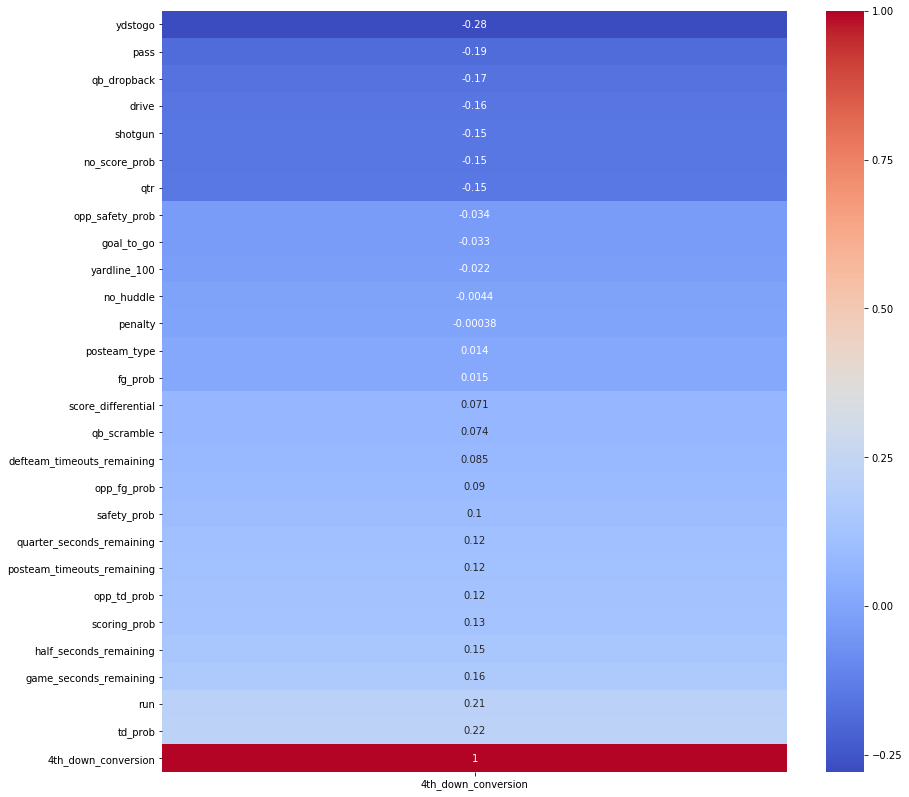

In [59]:
plt.figure(figsize= (14, 14))
sns.heatmap(df.corr()[['4th_down_conversion']].sort_values('4th_down_conversion'), annot = True, cmap = 'coolwarm');

# Check for collinearity

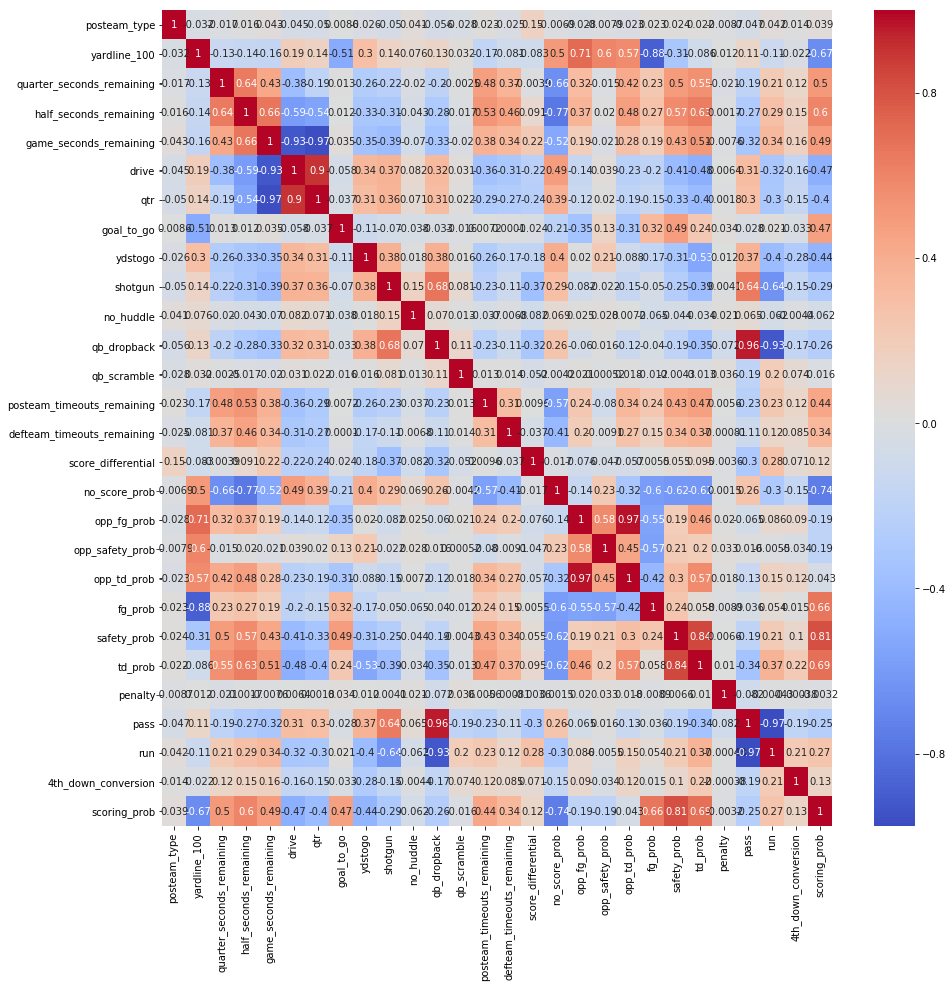

In [60]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True);

# Save csv

In [61]:
df.to_csv('../../datasets/model.csv')